<a href="https://colab.research.google.com/github/riley219-purdue/ME53900/blob/main/lecturebook/homework/homework-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [67]:
MAKE_BOOK_FIGURES=True
import numpy as np
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,

        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,

        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,

        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,

        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout settings
        'figure.constrained_layout.use': True,

        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.

    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'

    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

## Student details

+ **First Name: Megan**
+ **Last Name: Riley**
+ **Email: riley219@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): Yes**
+ **Which generative AI tool did you use (if applicable)?: ChatGPT**

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:**
<br><br>
Based on prior information: The percentage of the population infected by tuberculosis is 0.4\%
<br><br>
$p(B|I)$ = $\frac{0.4}{100}$
<br><br>
$\boxed{p(B|I) = 0.004}$


B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:**
<br><br>
Based on prior information: If a tested patient has the disease, then 80% of the time the test comes out positive.
<br><br>
$\boxed{p(A|B,I) = 0.80}$


C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:**
<br><br>
Based on prior information: If a tested patient does not have the disease, then 90% of the time the test comes out negative.
<br>
$p(\neg A|\neg B, I) = 0.90$
<br>
$p(A|\neg B, I) + p(\neg A|\neg B, I) = 1$
<br><br>
$p(A|\neg B, I) = 1 - 0.90$
<br>
$\boxed{p(A|\neg B, I) = 0.10}$



D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:**
<br><br>
$
p(A,B| I) = p(A|B,I) p(B|I)
$
<br>
$
p(A,B| I) = p(B|A,I) p(A|I)
$
<br>
$
p(A|B,I) p(B|I) = p(B|A,I) p(A|I)
$
<br>
$
p(B|A,I) = \frac{p(A|B,I) p(B|I)} {p(A|I)}
$
<br><br>
$
p(A|I) = p(A,B|I) + p(A,\neg B|I)
$
$
p(A|I) = p(A|B,I) p(B|I) + p(A|\neg B,I) p(\neg B|I)
$
<br><br>
$
{p(B|A,I) = \frac{p(A|B,I) p(B|I)} {p(A|B,I) p(B|I) + p(A|\neg B,I) p(\neg B|I)}
}
$
<br><br>
Where:
<br>
$p(B|I) = 0.004$  
$p(\neg B|I) = 1-0.004 = 0.996$  
$p(A|B,I) = 0.8$  
$p(A|\neg B,I) = 0.1$  
<br>
$
p(B|A,I) = \frac{(0.8)(0.004)}{(0.8)(0.004) + (0.1)(0.996)}
$
<br><br>
$\boxed{p(B | A, I) \approx 0.031}$


E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:**
<br><br>
$
p(\neg A,B | I) = p(\neg A|B,I) p(B|I)
$
<br>
$
p(\neg A,B | I) = p(B|\neg A,I) p(\neg A|I)
$
<br>
$
p(\neg A|B,I) p(B|I) = p(B|\neg A,I) p(\neg A|I)
$
<br>
$
p(B|\neg A,I) = \frac{p(\neg A|B,I) p(B|I)} {p(\neg A|I)}
$
<br><br>
$
p(\neg A|I) = p(\neg A,B|I) + p(\neg A,\neg B|I)
$
<br>
$
p(\neg A|I) = p(\neg A|B,I) p(B|I) + p(\neg A|\neg B,I) p(\neg B|I)
$
<br><br>
$
p(B|\neg A,I) = \frac{p(\neg A|B,I) p(B|I)} {p(\neg A|B,I) p(B|I) + p(\neg A|\neg B,I) p(\neg B|I)}
$
<br><br>
Where:
<br>
$p(B|I) = 0.004$  
$p(\neg B|I) = 1 - 0.004 = 0.996$  
$p(\neg A|B,I) = 1 - 0.8 = 0.2$  
$p(\neg A|\neg B,I) = 0.9$  
<br>
$
p(B|\neg A,I) = \frac{(0.2)(0.004)}{(0.2)(0.004) + (0.9)(0.996)}
$
<br><br>
$\boxed{p(B|\neg A,I) \approx 0.000892}$
<br><br>
Does the test change our prior state of knowledge about about the patient?
<br>
**Yes, the test does change our prior knowledge about the patient. Based on our prior knowledge it was stated that "The percentage of the population infected by tuberculosis is 0.4%" where ${p(B|I) = 0.004}$. After testing if the test was positive the proability increased ${p(B | A, I) \approx 0.031}$ and if negative the probability decreased to ${p(B|\neg A,I) \approx 0.000892}$.**
<br><br>
Is the test useful?
<br>
**Yes, the test is useful to perform on patients to determine if the patient has tuberculosis or not. The test is especially useful when used to determine that the patient does not have tuberculosis. The negative result reduces the probability of disease from the prior value of ${p(B|I) = 0.004}$ down to ${p(B|\neg A,I) \approx 0.000892}$. Whereas a positive result increases from the prior ${p(B|I) = 0.004}$ to ${p(B | A, I) \approx 0.031}$**


F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:**
<br><br>
Using the derived equation from part D:
<br>
$
{p(B|A,I) = \frac{p(A|B,I) p(B|I)} {p(A|B,I) p(B|I) + p(A|\neg B,I) p(\neg B|I)}
}
$

<br>
Where:
<br>
$p(B|A,I) = 0.99$
<br>
$p(B|I) = 0.004$
<br>
$p(\neg B|I) = 1 - 0.004 = 0.996$
<br><br>
$0.99 = \frac{p(A|B,I)(0.004)}{p(A|B,I)(0.004) + p(A|\neg B,I)(0.996)}$
<br><br>

$0.99[p(A|B,I)(0.004)+p(A|\neg B,I)(0.996)] = p(A|B,I)(0.004)$
<br>
$0.99*p(A|B,I)(0.004) + 0.99*p(A|\neg B,I)(0.996) = p(A|B,I)(0.004)$
<br>
$0.99*p(A|\neg B,I)(0.996) = p(A|B,I)(0.004) - 0.99*p(A|B,I)(0.004)$
<br>
$0.99*p(A|\neg B,I)(0.996) = (1 - 0.99)*p(A|B,I)(0.004)$
<br>
$0.99*p(A|\neg B,I)(0.996) = (1 - 0.99)*p(A|B,I)(0.004)$
<br>
$p(A|\neg B,I)= \frac{(0.01)(0.004)}{(0.99)(0.996)}*p(A|B,I)$

$p(A|\neg B,I) \approx 4.06 \times 10^{-5}*p(A|B,I)$
<br>

Selected value $p(A|B,I)= 0.95$:
<br>

$p(A|\neg B,I) \approx 4.06 \times 10^{-5}*(0.95)$
$p(A|\neg B,I) \approx 3.86 \times 10^{-5}$

Therefore:
<br>
$\boxed{p(A|B,I)=0.99}$
<br>
$\boxed{p(A|\neg B,I) \approx 3.86 \times 10^{-5}}$
<br><br>

**To select a good solution an analyst should find a balence of high senstivity ($p(A|B,I)$) and low false positive rates ($p(A|\neg B, I)$). Analsts could explore these values using probability simulations like the Monte Carlo method to repeatedly sample from ranges of ($p(A|B,I)$) and ($p(A|\neg B, I)$). Analsts can review these conditions under different scenarios and identify thresholds where false positives begin to dominate or sensitivity becomes insufficient.**

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**


In [68]:
import numpy as np
from scipy.stats import rv_discrete

x = np.array([0, 1, 2, 3])
p = np.array([0.3, 0.1, 0.2, 0.4])

X = rv_discrete(values=(x, p))

print(f"E[X] = {X.expect():.2f}")

E[X] = 1.70


B. The variance $\mathbb{V}[X]$.

**Answer:**

In [69]:
print(f"V[X] = {X.var():1.2f}")

V[X] = 1.61


C. Plot the probability mass function of $X$.

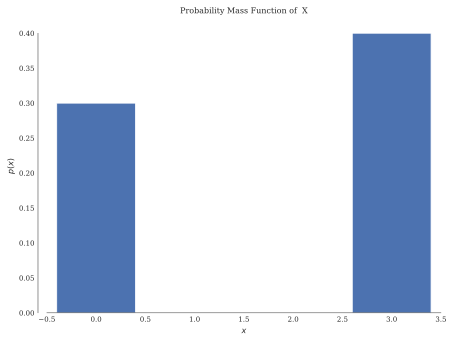

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(X.support(), X.pmf(X.support()))
ax.set_title("Probability Mass Function of  X")
ax.set_xlabel("$x$");
ax.set_ylabel("$p(x)$");
sns.despine(trim=True);



D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**
<br><br>

In [71]:
prob_part_d = X.pmf(0) + X.pmf(2)
print(f"P(X in {{0,2}}) = {prob_part_d:.2f}")

P(X in {0,2}) = 0.50


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**
<br><br>

In [72]:
E = X.expect()
expectation_part_e = 4 * E + 3
print(f"E[4X+3] = {expectation_part_e:.2f}")

E[4X+3] = 9.80


F. Find $\mathbb{V}[4X+3]$.

**Answer:**
<br><br>

In [73]:
V = X.var()
variance_part_f = (4**2) * V
print(f"V[4X+3] = {variance_part_f:.2f}")

V[4X+3] = 25.76


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

/tmp/ipython-input-2233696121.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", frameon=False)


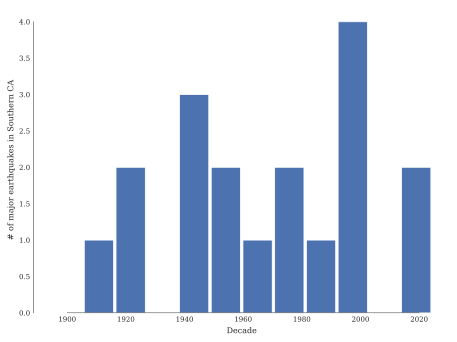

In [74]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [75]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [76]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

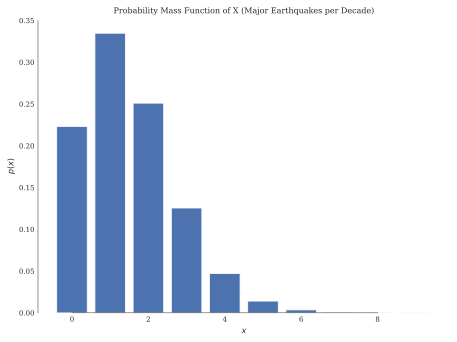

In [77]:
fig, ax = plt.subplots()
ks = range(10)
ax.bar(ks, X.pmf(ks))
ax.set_title("Probability Mass Function of X (Major Earthquakes per Decade)")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
sns.despine(trim=True);

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**

In [78]:
prob_part_b = 1 - X.pmf(0)
print(f"Probability that at least one major earthquake will occur in the next decade: {prob_part_b:.3f}")

Probability that at least one major earthquake will occur in the next decade: 0.777


C. What is the probability that at least one major earthquake will occur during the next two decades?
Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:**

In [79]:
Y = st.poisson(2 * r)
prob_part_c = 1 - Y.pmf(0)
print(f"Probability that at least one major earthquake will occur in the next two decades: {prob_part_c:.3f}")

Probability that at least one major earthquake will occur in the next two decades: 0.950


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:**


In [80]:
Z = st.poisson(5 * r)
prob_part_d = 1 - Z.pmf(0)
print(f"Probability that at least one major earthquake will occur in the next five decades: {prob_part_d:.3f}")

Probability that at least one major earthquake will occur in the next five decades: 0.999


## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [81]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [82]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (np.float64(448.066965711728), np.float64(0.7099665338918923), np.float64(3.4218808260575804), np.float64(0.41627831297126994))


Let's plot the fitted Weibul PDF and the data we used:

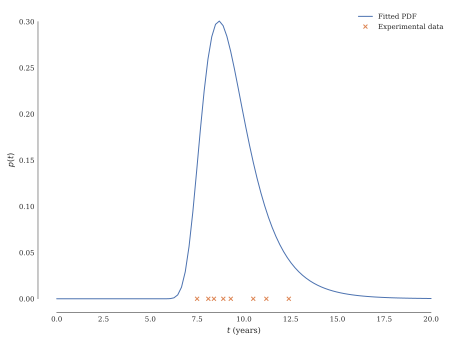

In [83]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [84]:
t_mean = T.mean()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

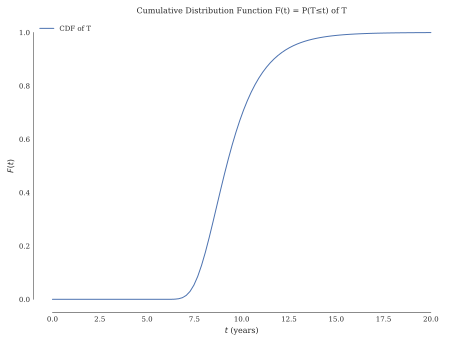

In [85]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.cdf(ts),
    label="CDF of T"
)
ax.set_title("Cumulative Distribution Function F(t) = P(T≤t) of T")
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$F(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

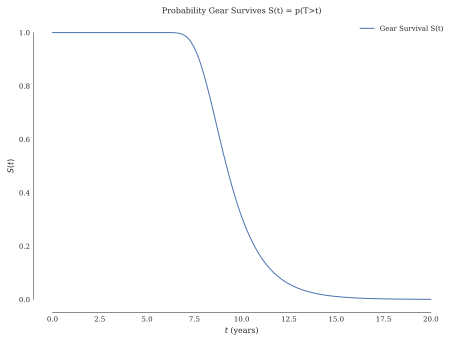

In [86]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    1- T.cdf(ts),
    label="Gear Survival S(t)"
)
ax.set_title("Probability Gear Survives S(t) = p(T>t)")
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$S(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

In [87]:
prob_part_d = T.cdf(10) - T.cdf(8)
print(f"Probability that the gear lasts anywhere between 8 and 10 years: {prob_part_d:.2f}")

Probability that the gear lasts anywhere between 8 and 10 years: 0.53


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [88]:
time_part_e = T.ppf(0.01)
print(f"Time t∗ such that the probability that the gear fails before t∗ is 0.01: {time_part_e:.2f}")


Time t∗ such that the probability that the gear fails before t∗ is 0.01: 6.98
